Import Python libraries

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
cmap = plt.colormaps['viridis']
import glob
import pyresample
import dask.dataframe as dd
import seaborn as sns
from tqdm import tqdm
from matplotlib.patches import Rectangle
import numpy.ma as ma

Define data location

In [1]:
open_path = 'path'

In [2]:
open_path_2 = 'path'

Define saving path

In [3]:
save_path = 'path'

Open stacked diffs files

In [7]:
stacked_diffs_mask1_201206 = xr.open_dataset(open_path_2 + 'Stacked_diffs_062012_Mask1_sea.nc')

In [8]:
stacked_diffs_mask1_201207 = xr.open_dataset(open_path_2 + 'Stacked_diffs_072012_Mask1_sea.nc')

In [9]:
stacked_diffs_mask1_201406 = xr.open_dataset(open_path_2 + 'Stacked_diffs_062014_Mask1_sea.nc')

In [10]:
stacked_diffs_mask1_201407 = xr.open_dataset(open_path_2 + 'Stacked_diffs_072014_Mask1_sea.nc')

Calculate averages and add them to a list

In [11]:
stacked_diffs_mask1_SAL_TOA_201206 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [12]:
stacked_diffs_mask1_SAL_TOA_201207 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [13]:
stacked_diffs_mask1_SAL_TOA_201406 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [14]:
stacked_diffs_mask1_SAL_TOA_201407 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [15]:
stacked_diffs_mask1_SAL_TOA_mean_201206 = stacked_diffs_mask1_SAL_TOA_201206.mean('time')

In [16]:
stacked_diffs_mask1_SAL_TOA_mean_201207 = stacked_diffs_mask1_SAL_TOA_201207.mean('time')

In [17]:
stacked_diffs_mask1_SAL_TOA_mean_201406 = stacked_diffs_mask1_SAL_TOA_201406.mean('time')

In [18]:
stacked_diffs_mask1_SAL_TOA_mean_201407 = stacked_diffs_mask1_SAL_TOA_201407.mean('time')

In [19]:
stacked_diffs_mask1_SAL_TOA_mean_list_201206 = []

In [20]:
stacked_diffs_mask1_SAL_TOA_mean_list_201207 = []

In [21]:
stacked_diffs_mask1_SAL_TOA_mean_list_201406 = []

In [22]:
stacked_diffs_mask1_SAL_TOA_mean_list_201407 = []

In [23]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask1_SAL_TOA_mean_201206.sel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask1_SAL_TOA_mean_list_201206.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:43<00:00,  8.30it/s]


In [24]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask1_SAL_TOA_mean_201207.sel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask1_SAL_TOA_mean_list_201207.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:42<00:00,  8.36it/s]


In [25]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask1_SAL_TOA_mean_201406.sel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask1_SAL_TOA_mean_list_201406.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:42<00:00,  8.47it/s]


In [26]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask1_SAL_TOA_mean_201407.sel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask1_SAL_TOA_mean_list_201407.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:42<00:00,  8.37it/s]


Open results modelled with SMAC

In [27]:
SMAC_diff_VIS_file_201206_Mask1 = open(open_path + 'VIS201206_r_diff_list_Mask1.txt')
SMAC_diff_VIS_201206_Mask1 = SMAC_diff_VIS_file_201206_Mask1.readlines()

In [28]:
SMAC_diff_NIR_file_201206_Mask1 = open(open_path + 'NIR201206_r_diff_list_Mask1.txt')
SMAC_diff_NIR_201206_Mask1 = SMAC_diff_NIR_file_201206_Mask1.readlines()

In [29]:
SMAC_diff_VIS_file_201207_Mask1 = open(open_path + 'VIS201207_r_diff_list_Mask1.txt')
SMAC_diff_VIS_201207_Mask1 = SMAC_diff_VIS_file_201207_Mask1.readlines()

In [30]:
SMAC_diff_NIR_file_201207_Mask1 = open(open_path + 'NIR201207_r_diff_list_Mask1.txt')
SMAC_diff_NIR_201207_Mask1 = SMAC_diff_NIR_file_201207_Mask1.readlines()

In [31]:
SMAC_diff_VIS_file_201406_Mask1 = open(open_path + 'VIS201406_r_diff_list_Mask1.txt')
SMAC_diff_VIS_201406_Mask1 = SMAC_diff_VIS_file_201406_Mask1.readlines()

In [32]:
SMAC_diff_NIR_file_201406_Mask1 = open(open_path + 'NIR201406_r_diff_list_Mask1.txt')
SMAC_diff_NIR_201406_Mask1 = SMAC_diff_NIR_file_201406_Mask1.readlines()

In [33]:
SMAC_diff_VIS_file_201407_Mask1 = open(open_path + 'VIS201407_r_diff_list_Mask1.txt')
SMAC_diff_VIS_201407_Mask1 = SMAC_diff_VIS_file_201407_Mask1.readlines()

In [34]:
SMAC_diff_NIR_file_201407_Mask1 = open(open_path + 'NIR201407_r_diff_list_Mask1.txt')
SMAC_diff_NIR_201407_Mask1 = SMAC_diff_NIR_file_201407_Mask1.readlines()

Calculate Broadband albedo

In [35]:
length201206_Mask1 = len(SMAC_diff_VIS_201206_Mask1)

In [36]:
length201207_Mask1 = len(SMAC_diff_VIS_201207_Mask1)

In [37]:
length201406_Mask1 = len(SMAC_diff_NIR_201406_Mask1)

In [38]:
length201407_Mask1 = len(SMAC_diff_VIS_201407_Mask1)

In [39]:
SMAC_diff_VIS_201206_Mask1_list = []
SMAC_diff_NIR_201206_Mask1_list = []
DIFF_SMAC_list_201206_Mask1 = []

In [40]:
SMAC_diff_VIS_201207_Mask1_list = []
SMAC_diff_NIR_201207_Mask1_list = []
DIFF_SMAC_list_201207_Mask1 = []

In [41]:
SMAC_diff_VIS_201406_Mask1_list = []
SMAC_diff_NIR_201406_Mask1_list = []
DIFF_SMAC_list_201406_Mask1 = []

In [42]:
SMAC_diff_VIS_201407_Mask1_list = []
SMAC_diff_NIR_201407_Mask1_list = []
DIFF_SMAC_list_201407_Mask1 = []

In [43]:
for i in range(length201206_Mask1):
    SMAC_diff_VIS_201206_Mask1_list.append(float(SMAC_diff_NIR_201206_Mask1[i][0:-1]))
    SMAC_diff_NIR_201206_Mask1_list.append(float(SMAC_diff_NIR_201206_Mask1[i][0:-1]))

In [44]:
for i in range(length201207_Mask1):
    SMAC_diff_VIS_201207_Mask1_list.append(float(SMAC_diff_NIR_201207_Mask1[i][0:-1]))
    SMAC_diff_NIR_201207_Mask1_list.append(float(SMAC_diff_NIR_201207_Mask1[i][0:-1]))

In [45]:
for i in range(length201406_Mask1):
    SMAC_diff_VIS_201406_Mask1_list.append(float(SMAC_diff_NIR_201406_Mask1[i][0:-1]))
    SMAC_diff_NIR_201406_Mask1_list.append(float(SMAC_diff_NIR_201406_Mask1[i][0:-1]))

In [46]:
for i in range(length201407_Mask1):
    SMAC_diff_VIS_201407_Mask1_list.append(float(SMAC_diff_NIR_201407_Mask1[i][0:-1]))
    SMAC_diff_NIR_201407_Mask1_list.append(float(SMAC_diff_NIR_201407_Mask1[i][0:-1]))

In [47]:
for i in range(length201206_Mask1):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201206_Mask1_list[i] + 0.464*SMAC_diff_NIR_201206_Mask1_list[i]
    DIFF_SMAC_list_201206_Mask1.append(DIFF_SMAC)

In [48]:
for i in range(length201207_Mask1):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201207_Mask1_list[i] + 0.464*SMAC_diff_NIR_201207_Mask1_list[i]
    DIFF_SMAC_list_201207_Mask1.append(DIFF_SMAC)

In [49]:
for i in range(length201406_Mask1):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201406_Mask1_list[i] + 0.464*SMAC_diff_NIR_201406_Mask1_list[i]
    DIFF_SMAC_list_201406_Mask1.append(DIFF_SMAC)

In [50]:
for i in range(length201407_Mask1):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201407_Mask1_list[i] + 0.464*SMAC_diff_NIR_201407_Mask1_list[i]
    DIFF_SMAC_list_201407_Mask1.append(DIFF_SMAC)

Plot the observed and modelled albedo results

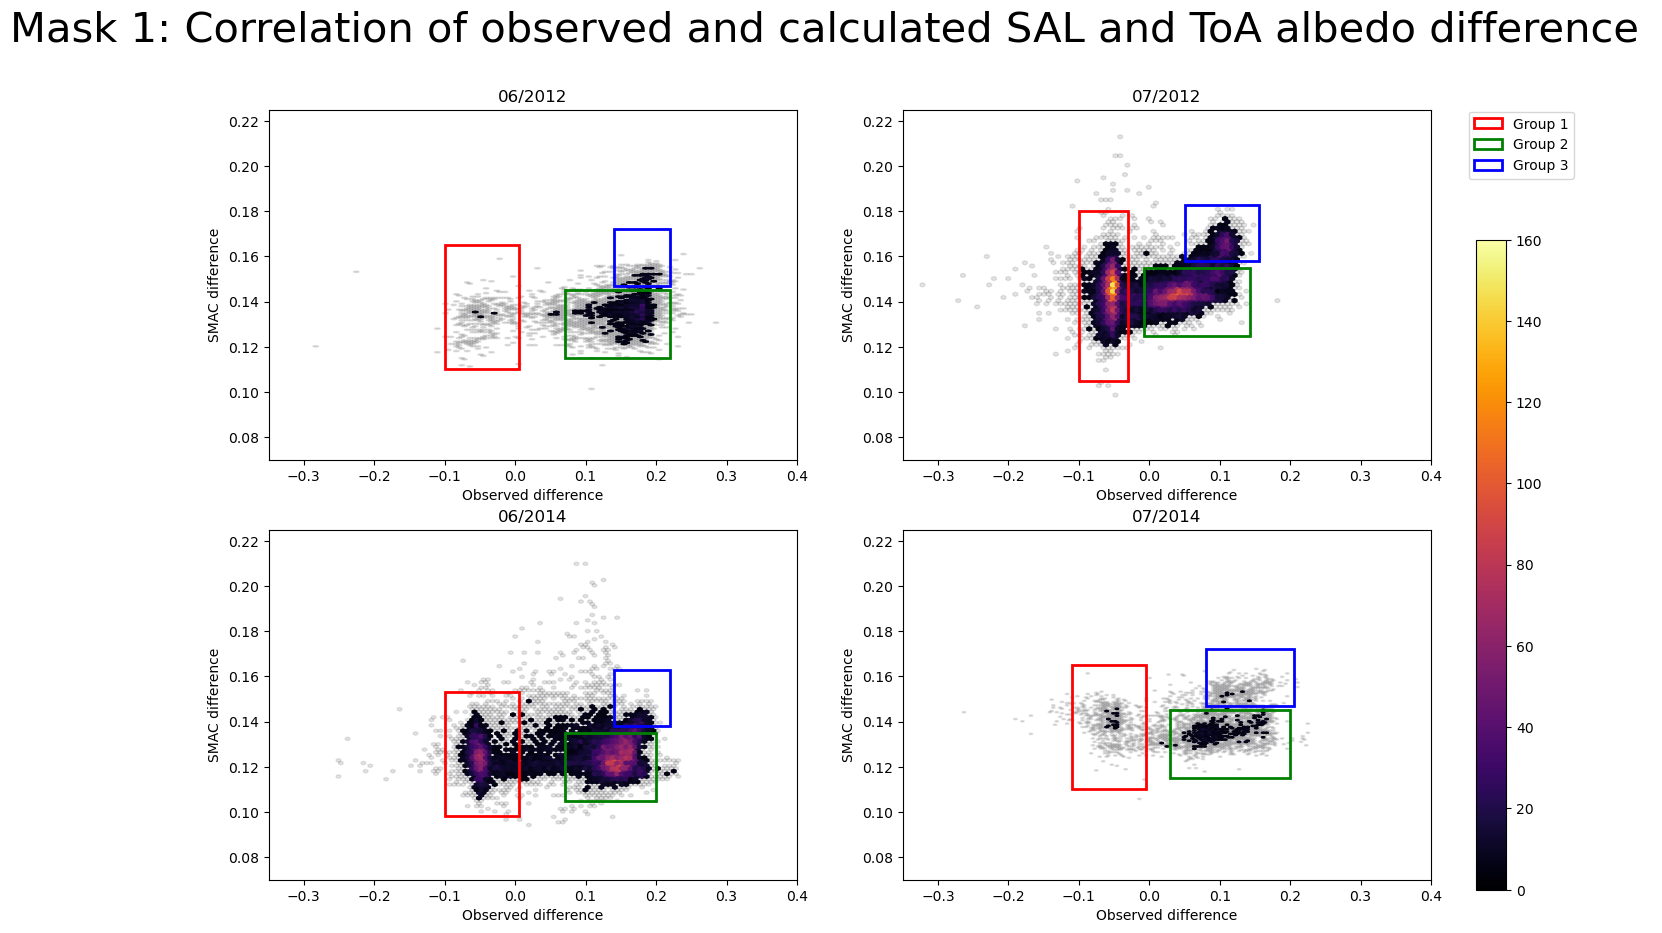

In [51]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.07
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax0.add_patch(Rectangle((0.07,0.115),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax0.add_patch(Rectangle((0.14,0.147),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))


c = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.105),0.07,0.075,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax1.add_patch(Rectangle((-0.007,0.125),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax1.add_patch(Rectangle((0.05,0.158),0.105,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))


c = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')

ax2.add_patch(Rectangle((-0.1,0.098),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax2.add_patch(Rectangle((0.07,0.105),0.13,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax2.add_patch(Rectangle((0.14,0.138),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))


c = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')

ax3.add_patch(Rectangle((-0.11,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2, 
                    label="Group 1"))

ax3.add_patch(Rectangle((0.03,0.115),0.17,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2"))

ax3.add_patch(Rectangle((0.08,0.147),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    label="Group 3"))

#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 1: Correlation of observed and calculated SAL and ToA albedo difference ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_ToA_difference_correlation_mask1_Group1_3.png')
plt.show()

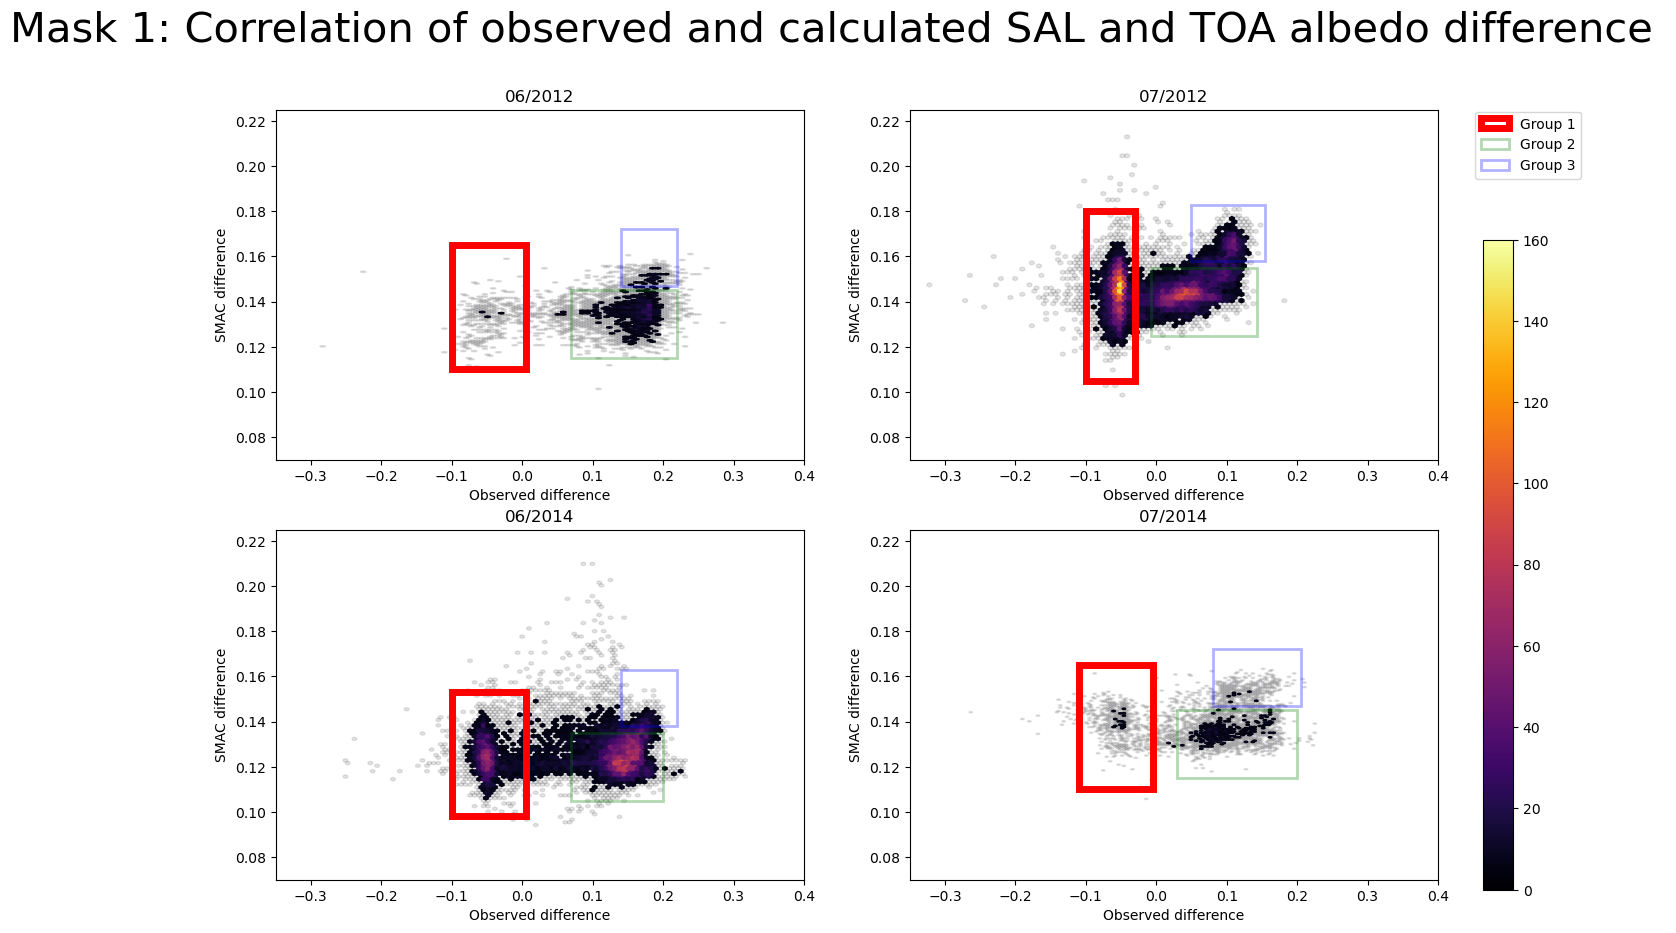

In [52]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.07
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax0.add_patch(Rectangle((0.07,0.115),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.14,0.147),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.105),0.07,0.075,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax1.add_patch(Rectangle((-0.007,0.125),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.05,0.158),0.105,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')

ax2.add_patch(Rectangle((-0.1,0.098),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax2.add_patch(Rectangle((0.07,0.105),0.13,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.14,0.138),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')

ax3.add_patch(Rectangle((-0.11,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=5, 
                    label="Group 1"))

ax3.add_patch(Rectangle((0.03,0.115),0.17,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.08,0.147),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    label="Group 3",
                    alpha=0.3))

#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 1: Correlation of observed and calculated SAL and TOA albedo difference ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_correlation_mask1_Group1_highlighted.png')
plt.show()

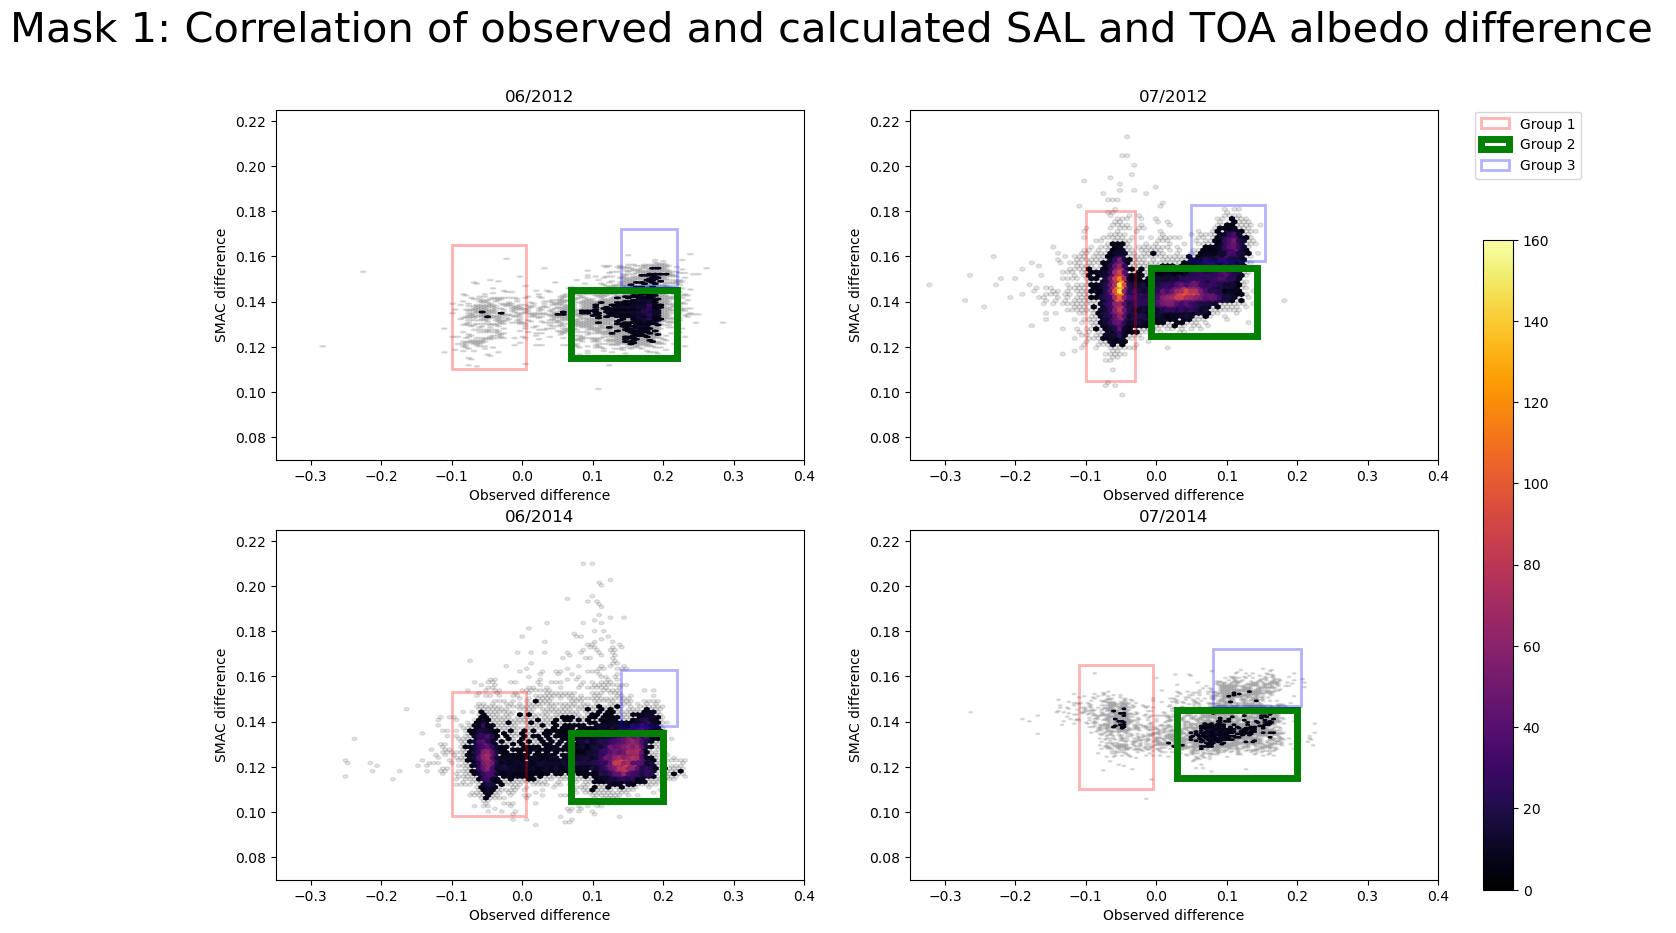

In [53]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.07
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.07,0.115),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax0.add_patch(Rectangle((0.14,0.147),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.105),0.07,0.075,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((-0.007,0.125),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax1.add_patch(Rectangle((0.05,0.158),0.105,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')

ax2.add_patch(Rectangle((-0.1,0.098),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.07,0.105),0.13,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax2.add_patch(Rectangle((0.14,0.138),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))


c = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')

ax3.add_patch(Rectangle((-0.11,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2, 
                    label="Group 1",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.03,0.115),0.17,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=5,
                    label="Group 2"))

ax3.add_patch(Rectangle((0.08,0.147),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    label="Group 3",
                    alpha=0.3))


#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 1: Correlation of observed and calculated SAL and TOA albedo difference ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_correlation_mask1_Group2_highlighted.png')
plt.show()

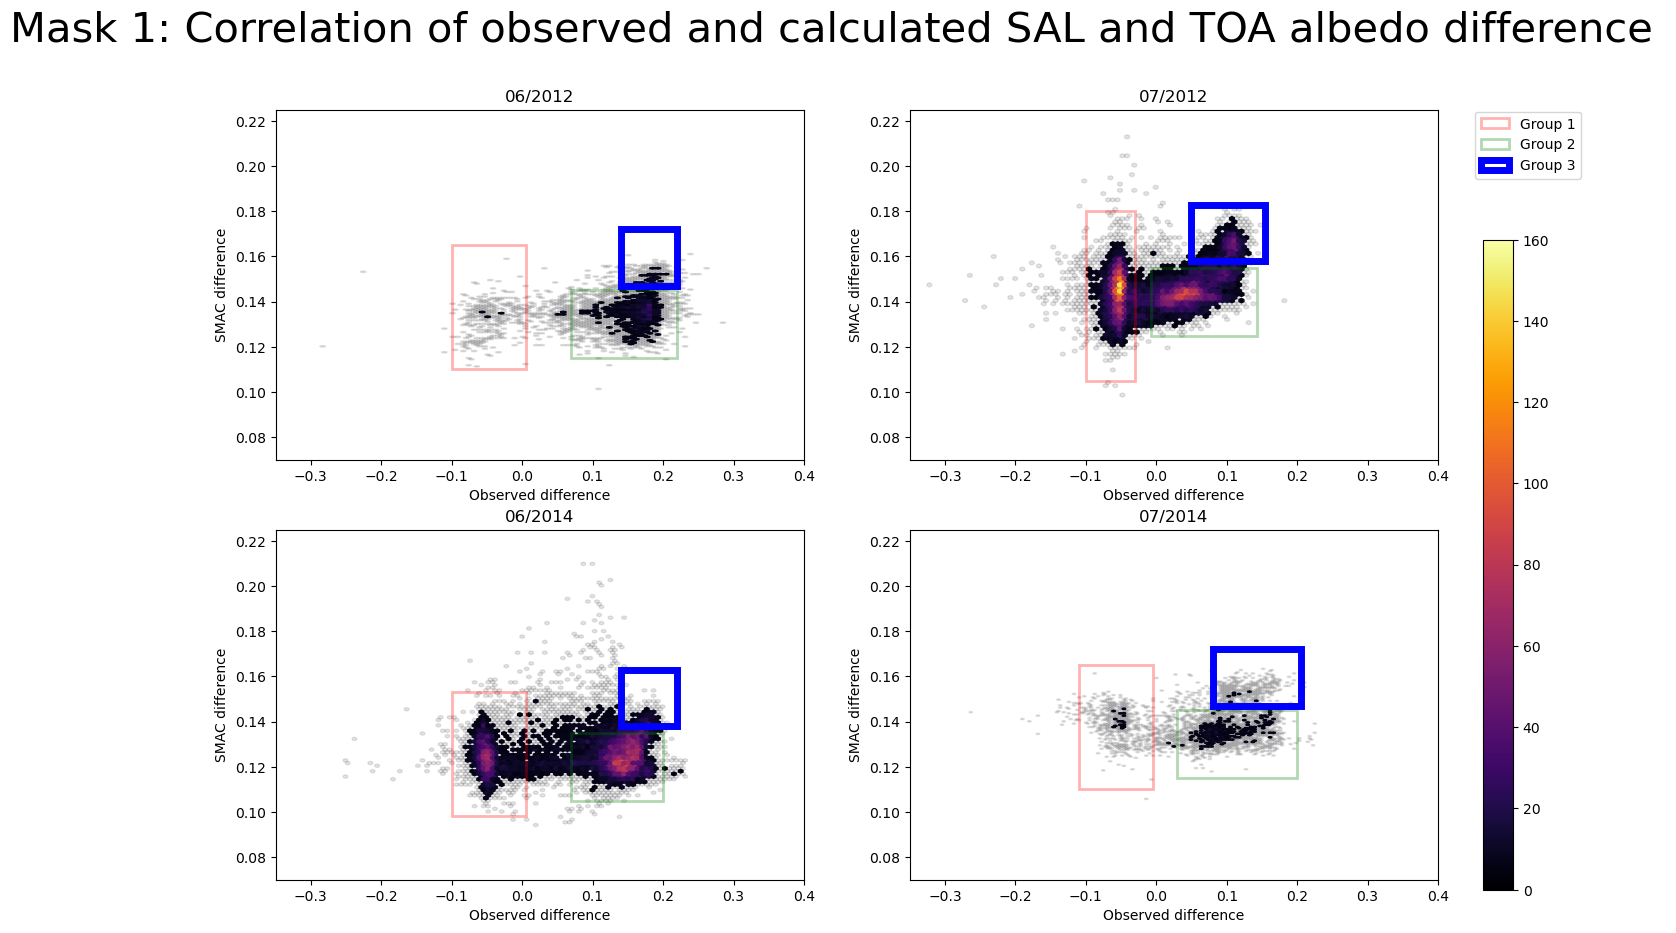

In [54]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.07
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.07,0.115),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.14,0.147),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))


c = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.105),0.07,0.075,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((-0.007,0.125),0.15,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.05,0.158),0.105,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))


c = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')

ax2.add_patch(Rectangle((-0.1,0.098),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.07,0.105),0.13,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.14,0.138),0.08,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))


c = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask1_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask1, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')

ax3.add_patch(Rectangle((-0.11,0.11),0.105,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2, 
                    label="Group 1",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.03,0.115),0.17,0.03,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.08,0.147),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5,
                    label="Group 3"))


#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 1: Correlation of observed and calculated SAL and TOA albedo difference ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_correlation_mask1_Group3_highlighted.png')
plt.show()

Make masks 1-3 based on limits of observed and modelled data defined in previous graphs. 

In [55]:
DIFF_SMAC_list_201206_array = np.asarray(DIFF_SMAC_list_201206_Mask1)

In [56]:
DIFF_SMAC_list_201207_array = np.asarray(DIFF_SMAC_list_201207_Mask1)

In [57]:
DIFF_SMAC_list_201406_array = np.asarray(DIFF_SMAC_list_201206_Mask1)

In [58]:
DIFF_SMAC_list_201407_array = np.asarray(DIFF_SMAC_list_201407_Mask1)

In [59]:
DIFF_SMAC_list_201206_array_2d = np.reshape(DIFF_SMAC_list_201206_array, (359,359)).T

In [60]:
DIFF_SMAC_list_201207_array_2d = np.reshape(DIFF_SMAC_list_201207_array, (359,359)).T

In [61]:
DIFF_SMAC_list_201406_array_2d = np.reshape(DIFF_SMAC_list_201406_array, (359,359)).T

In [62]:
DIFF_SMAC_list_201407_array_2d = np.reshape(DIFF_SMAC_list_201407_array, (359,359)).T

Define limits for each group

Group 1 (red)

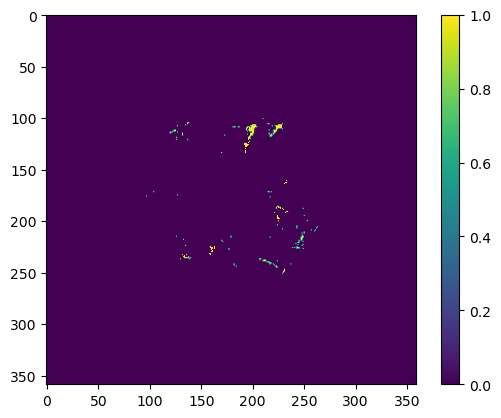

In [63]:
condition_lower_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_1 = condition_lower_062012>-0.1

condition_upper_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_1 = condition_upper_062012<0.005

condition_secondary_lower_062012_1 = DIFF_SMAC_list_201206_array_2d.T>0.11

condition_secondary_upper_062012_1 = DIFF_SMAC_list_201206_array_2d.T<0.165


combined_condition_062012_1 = (condition_lower_062012_1) & (condition_upper_062012_1) & (condition_secondary_lower_062012_1) & (condition_secondary_upper_062012_1)

plt.imshow(combined_condition_062012_1)
plt.colorbar()

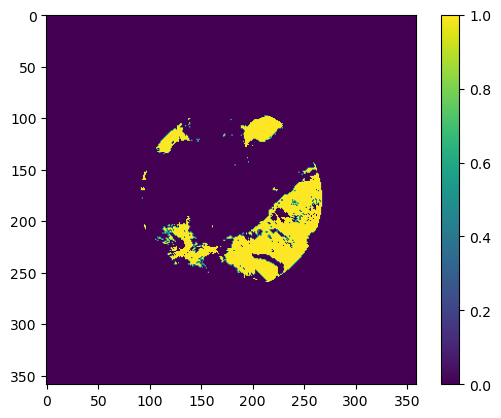

In [64]:
condition_lower_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_1 = condition_lower_072012>-0.1

condition_upper_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_1 = condition_upper_072012<-0.03

condition_secondary_lower_072012_1 = DIFF_SMAC_list_201207_array_2d.T>0.105

condition_secondary_upper_072012_1 = DIFF_SMAC_list_201207_array_2d.T<0.18


combined_condition_072012_1 = (condition_lower_072012_1) & (condition_upper_072012_1) & (condition_secondary_lower_072012_1) & (condition_secondary_upper_072012_1)

plt.imshow(combined_condition_072012_1)
plt.colorbar()

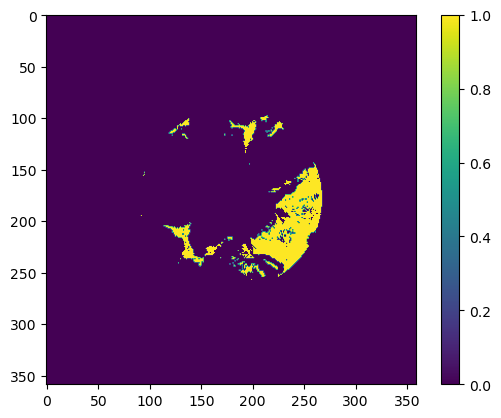

In [65]:
condition_lower_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_1 = condition_lower_062014>-0.1

condition_upper_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_1 = condition_upper_062014<0.005

condition_secondary_lower_062014_1 = DIFF_SMAC_list_201406_array_2d.T>0.098

condition_secondary_upper_062014_1 = DIFF_SMAC_list_201406_array_2d.T<0.153


combined_condition_062014_1 = (condition_lower_062014_1) & (condition_upper_062014_1) & (condition_secondary_lower_062014_1) & (condition_secondary_upper_062014_1)

plt.imshow(combined_condition_062014_1)
plt.colorbar()

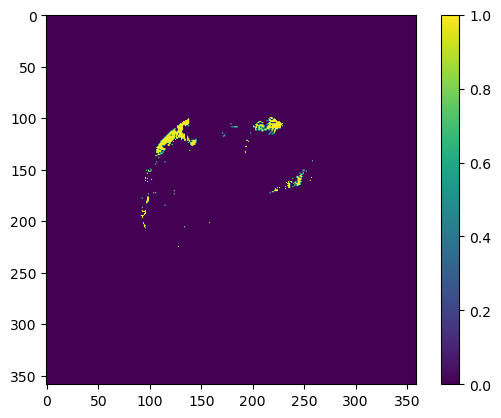

In [66]:
condition_lower_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_1 = condition_lower_072014>-0.11

condition_upper_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_1 = condition_upper_072014<0.005

condition_secondary_lower_072014_1 = DIFF_SMAC_list_201407_array_2d.T>0.11

condition_secondary_upper_072014_1 = DIFF_SMAC_list_201407_array_2d.T<0.165


combined_condition_072014_1 = (condition_lower_072014_1) & (condition_upper_072014_1) & (condition_secondary_lower_072014_1) & (condition_secondary_upper_072014_1)

plt.imshow(combined_condition_072014_1)
plt.colorbar()

Group 2 (green)

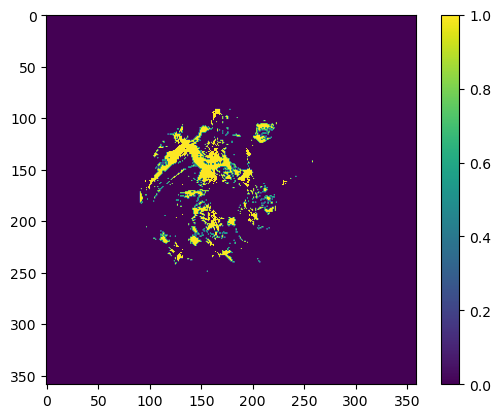

In [67]:
condition_lower_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_2 = condition_lower_062012>0.07

condition_upper_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_2 = condition_upper_062012<0.22

condition_secondary_lower_062012_2 = DIFF_SMAC_list_201206_array_2d.T>0.115

condition_secondary_upper_062012_2 = DIFF_SMAC_list_201206_array_2d.T<0.145


combined_condition_062012_2 = (condition_lower_062012_2) & (condition_upper_062012_2) & (condition_secondary_lower_062012_2) & (condition_secondary_upper_062012_2)

plt.imshow(combined_condition_062012_2)
plt.colorbar()

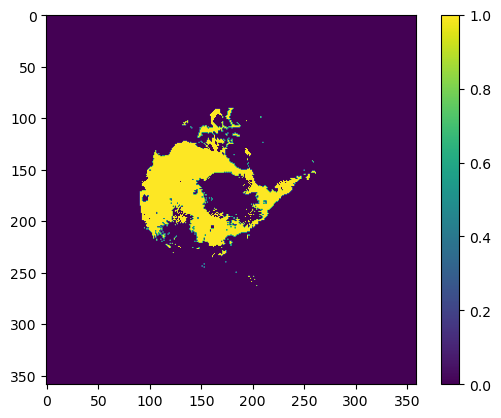

In [68]:
condition_lower_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_2 = condition_lower_072012>-0.007

condition_upper_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_2 = condition_upper_072012<0.143

condition_secondary_lower_072012_2 = DIFF_SMAC_list_201207_array_2d.T>0.125

condition_secondary_upper_072012_2 = DIFF_SMAC_list_201207_array_2d.T<0.155


combined_condition_072012_2 = (condition_lower_072012_2) & (condition_upper_072012_2) & (condition_secondary_lower_072012_2) & (condition_secondary_upper_072012_2)

plt.imshow(combined_condition_072012_2)
plt.colorbar()

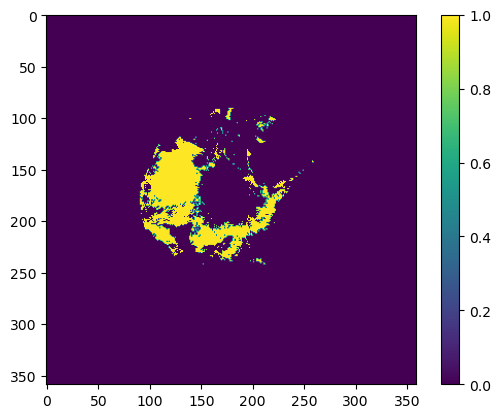

In [69]:
condition_lower_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_2 = condition_lower_062014>0.07

condition_upper_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_2 = condition_upper_062014<0.2

condition_secondary_lower_062014_2 = DIFF_SMAC_list_201406_array_2d.T>0.105

condition_secondary_upper_062014_2 = DIFF_SMAC_list_201406_array_2d.T<0.135


combined_condition_062014_2 = (condition_lower_062014_2) & (condition_upper_062014_2) & (condition_secondary_lower_062014_2) & (condition_secondary_upper_062014_2)

plt.imshow(combined_condition_062014_2)
plt.colorbar()

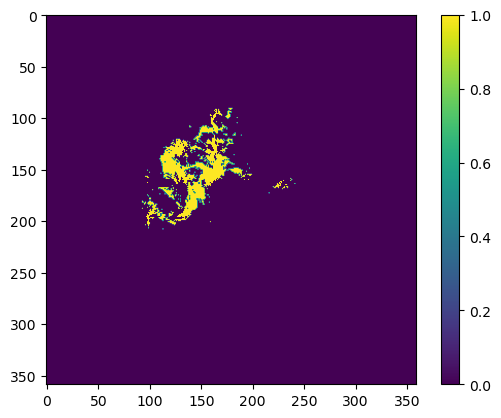

In [70]:
condition_lower_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_2 = condition_lower_072014>0.03

condition_upper_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_2 = condition_upper_072014<0.2

condition_secondary_lower_072014_2 = DIFF_SMAC_list_201407_array_2d.T>0.11

condition_secondary_upper_072014_2 = DIFF_SMAC_list_201407_array_2d.T<0.145


combined_condition_072014_2 = (condition_lower_072014_2) & (condition_upper_072014_2) & (condition_secondary_lower_072014_2) & (condition_secondary_upper_072014_2)

plt.imshow(combined_condition_072014_2)
plt.colorbar()

Group 3 (blue)

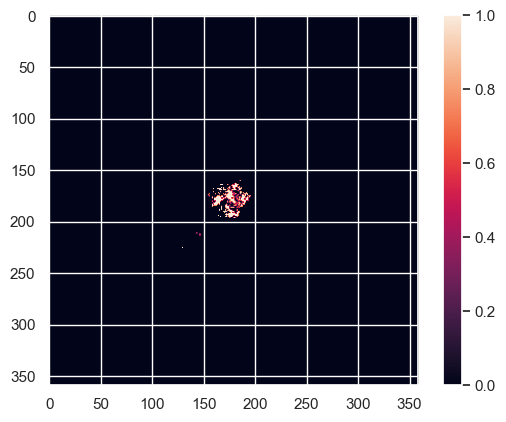

In [211]:
condition_lower_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_3 = condition_lower_062012>0.14

condition_upper_062012 = stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_3 = condition_upper_062012<0.22

condition_secondary_lower_062012_3 = DIFF_SMAC_list_201206_array_2d.T>0.147

condition_secondary_upper_062012_3 = DIFF_SMAC_list_201206_array_2d.T<0.172


combined_condition_062012_3 = (condition_lower_062012_3) & (condition_upper_062012_3) & (condition_secondary_lower_062012_3) & (condition_secondary_upper_062012_3)

plt.imshow(combined_condition_062012_3)
plt.colorbar()

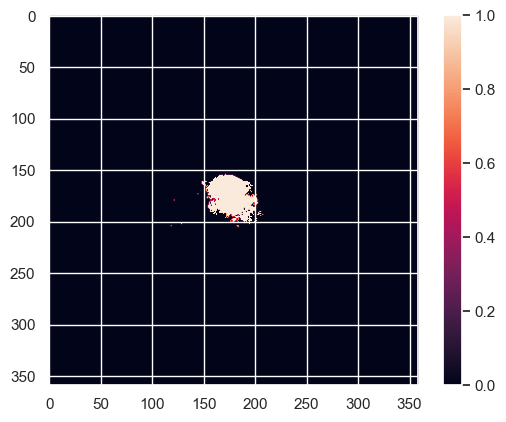

In [212]:
condition_lower_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_3 = condition_lower_072012>0.05

condition_upper_072012 = stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_3 = condition_upper_072012<0.155

condition_secondary_lower_072012_3 = DIFF_SMAC_list_201207_array_2d.T>0.158

condition_secondary_upper_072012_3 = DIFF_SMAC_list_201207_array_2d.T<0.183


combined_condition_072012_3 = (condition_lower_072012_3) & (condition_upper_072012_3) & (condition_secondary_lower_072012_3) & (condition_secondary_upper_072012_3)

plt.imshow(combined_condition_072012_3)
plt.colorbar()

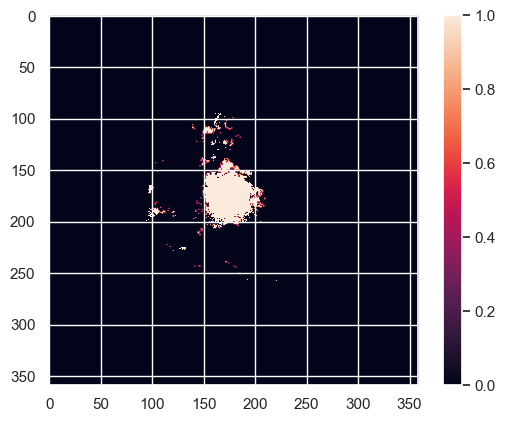

In [213]:
condition_lower_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_3 = condition_lower_062014>0.14

condition_upper_062014 = stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_3 = condition_upper_062014<0.22

condition_secondary_lower_062014_3 = DIFF_SMAC_list_201406_array_2d.T>0.138

condition_secondary_upper_062014_3 = DIFF_SMAC_list_201406_array_2d.T<0.163


combined_condition_062014_3 = (condition_lower_062014_3) & (condition_upper_062014_3) & (condition_secondary_lower_062014_3) & (condition_secondary_upper_062014_3)

plt.imshow(combined_condition_062014_3)
plt.colorbar()

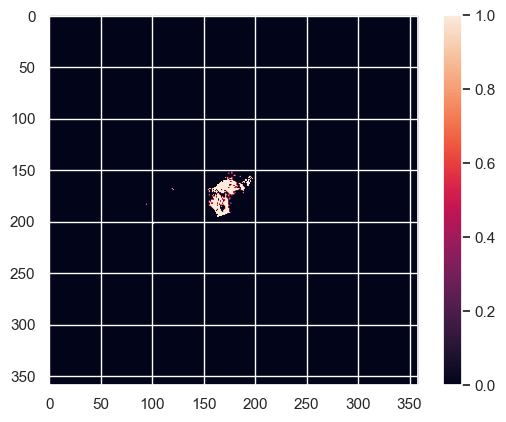

In [214]:
condition_lower_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_3 = condition_lower_072014>0.08

condition_upper_072014 = stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_3 = condition_upper_072014<0.205

condition_secondary_lower_072014_3 = DIFF_SMAC_list_201407_array_2d.T>0.147

condition_secondary_upper_072014_3 = DIFF_SMAC_list_201407_array_2d.T<0.172


combined_condition_072014_3 = (condition_lower_072014_3) & (condition_upper_072014_3) & (condition_secondary_lower_072014_3) & (condition_secondary_upper_072014_3)

plt.imshow(combined_condition_072014_3)
plt.colorbar()

Use the masks created in previous step to select the correct data

Group 1

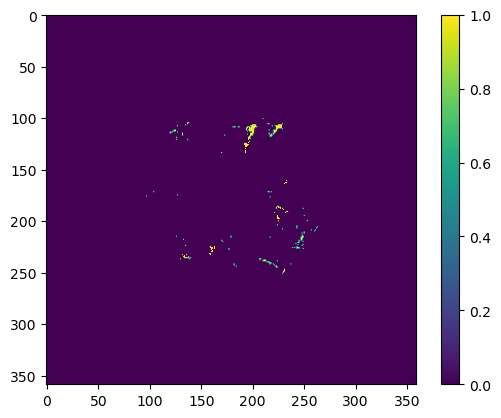

In [75]:
combined_condition_062012_1_nan = np.array(combined_condition_062012_1)

plt.imshow(combined_condition_062012_1_nan)
plt.colorbar()
plt.show()

combined_condition_062012_1_nan = np.where((combined_condition_062012_1_nan==0.0) & (stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_1_nan)



data_062012_1 = combined_condition_062012_1_nan*stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

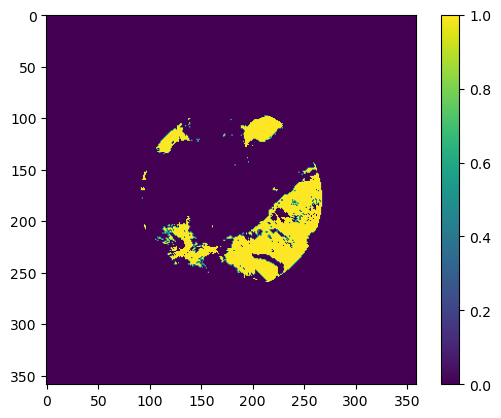

In [76]:
combined_condition_072012_1_nan = np.array(combined_condition_072012_1)

plt.imshow(combined_condition_072012_1_nan)
plt.colorbar()
plt.show()

combined_condition_072012_1_nan = np.where((combined_condition_072012_1_nan==0.0) & (stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_1_nan)



data_072012_1 = combined_condition_072012_1_nan*stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

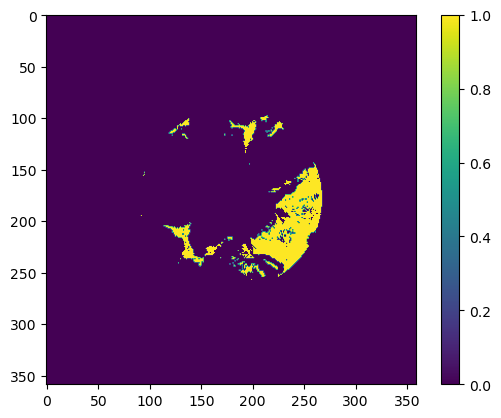

In [77]:
combined_condition_062014_1_nan = np.array(combined_condition_062014_1)

plt.imshow(combined_condition_062014_1_nan)
plt.colorbar()
plt.show()

combined_condition_062014_1_nan = np.where((combined_condition_062014_1_nan==0.0) & (stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_1_nan)



data_062014_1 = combined_condition_062014_1_nan*stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

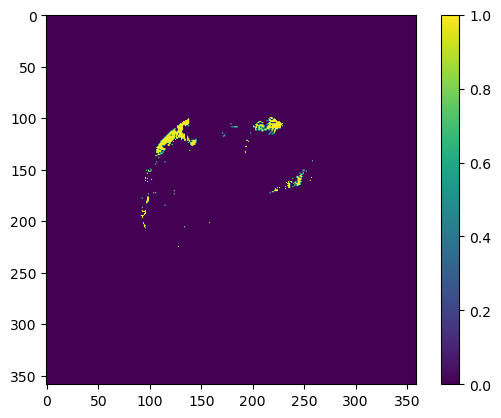

In [78]:
combined_condition_072014_1_nan = np.array(combined_condition_072014_1)

plt.imshow(combined_condition_072014_1_nan)
plt.colorbar()
plt.show()

combined_condition_072014_1_nan = np.where((combined_condition_072014_1_nan==0.0) & (stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_1_nan)



data_072014_1 = combined_condition_072014_1_nan*stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Group 2

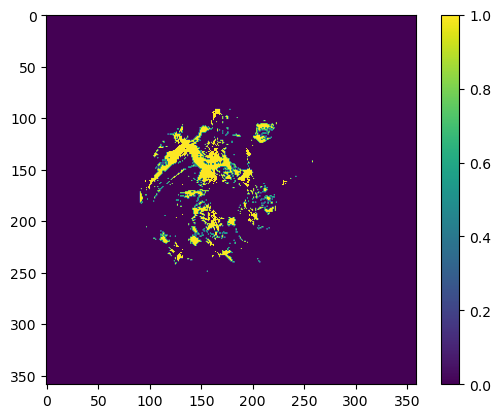

In [79]:
combined_condition_062012_2_nan = np.array(combined_condition_062012_2)

plt.imshow(combined_condition_062012_2_nan)
plt.colorbar()
plt.show()

combined_condition_062012_2_nan = np.where((combined_condition_062012_2_nan==0.0) & (stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_2_nan)



data_062012_2 = combined_condition_062012_2_nan*stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

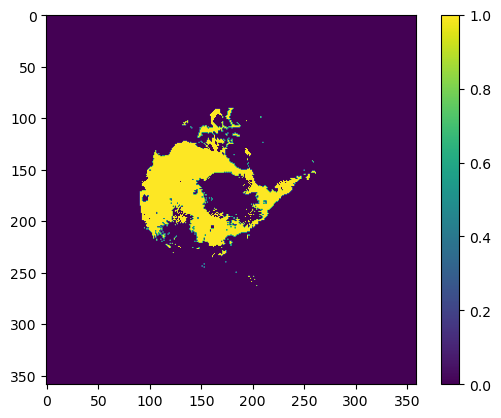

In [80]:
combined_condition_072012_2_nan = np.array(combined_condition_072012_2)

plt.imshow(combined_condition_072012_2_nan)
plt.colorbar()
plt.show()

combined_condition_072012_2_nan = np.where((combined_condition_072012_2_nan==0.0) & (stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_2_nan)



data_072012_2 = combined_condition_072012_2_nan*stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

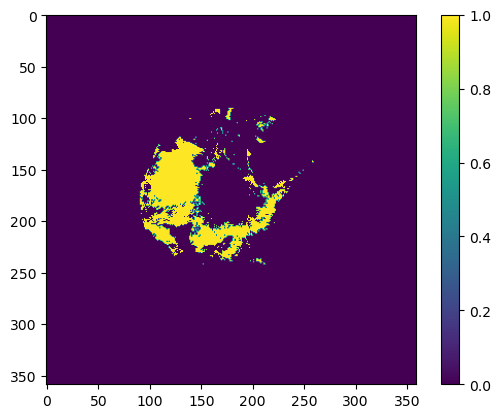

In [81]:
combined_condition_062014_2_nan = np.array(combined_condition_062014_2)

plt.imshow(combined_condition_062014_2_nan)
plt.colorbar()
plt.show()

combined_condition_062014_2_nan = np.where((combined_condition_062014_2_nan==0.0) & (stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_2_nan)



data_062014_2 = combined_condition_062014_2_nan*stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

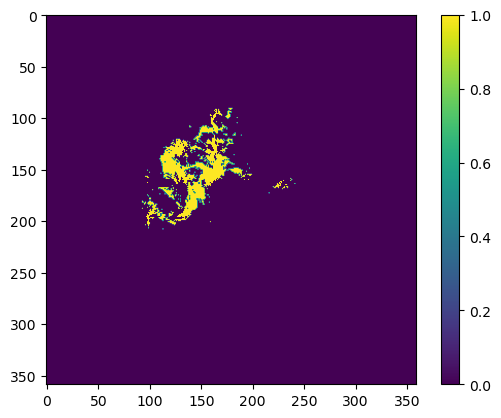

In [82]:
combined_condition_072014_2_nan = np.array(combined_condition_072014_2)

plt.imshow(combined_condition_072014_2_nan)
plt.colorbar()
plt.show()

combined_condition_072014_2_nan = np.where((combined_condition_072014_2_nan==0.0) & (stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_2_nan)



data_072014_2 = combined_condition_072014_2_nan*stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Group 3

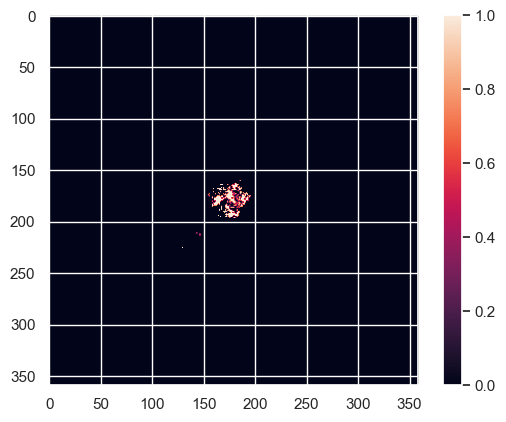

In [215]:
combined_condition_062012_3_nan = np.array(combined_condition_062012_3)

plt.imshow(combined_condition_062012_3_nan)
plt.colorbar()
plt.show()

combined_condition_062012_3_nan = np.where((combined_condition_062012_3_nan==0.0) & (stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_3_nan)



data_062012_3 = combined_condition_062012_3_nan*stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

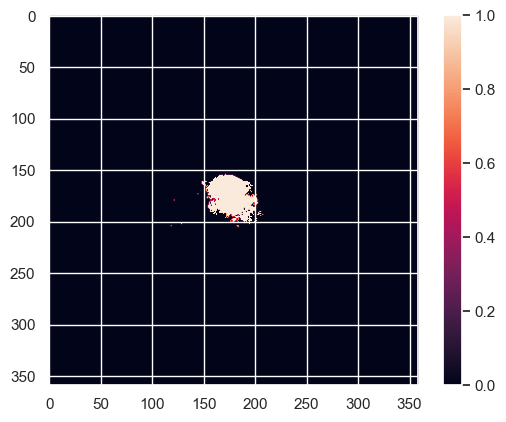

In [216]:
combined_condition_072012_3_nan = np.array(combined_condition_072012_3)

plt.imshow(combined_condition_072012_3_nan)
plt.colorbar()
plt.show()

combined_condition_072012_3_nan = np.where((combined_condition_072012_3_nan==0.0) & (stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_3_nan)



data_072012_3 = combined_condition_072012_3_nan*stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

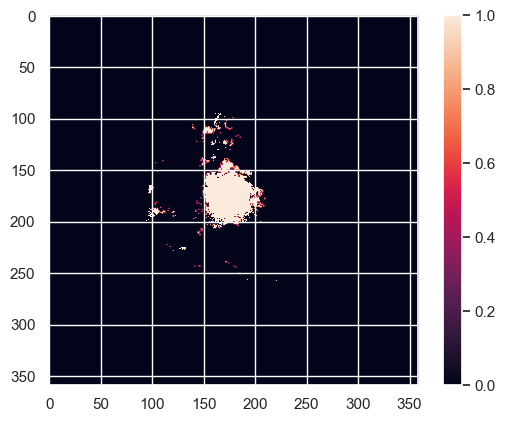

In [217]:
combined_condition_062014_3_nan = np.array(combined_condition_062014_3)

plt.imshow(combined_condition_062014_3_nan)
plt.colorbar()
plt.show()

combined_condition_062014_3_nan = np.where((combined_condition_062014_3_nan==0.0) & (stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_3_nan)



data_062014_3 = combined_condition_062014_3_nan*stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

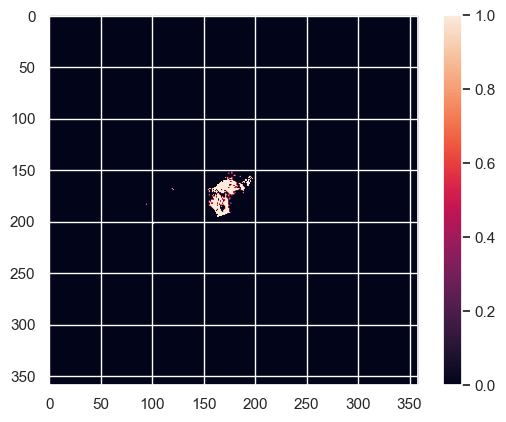

In [218]:
combined_condition_072014_3_nan = np.array(combined_condition_072014_3)

plt.imshow(combined_condition_072014_3_nan)
plt.colorbar()
plt.show()

combined_condition_072014_3_nan = np.where((combined_condition_072014_3_nan==0.0) & (stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_3_nan)



data_072014_3 = combined_condition_072014_3_nan*stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Remove Nan values

Group 1

In [158]:
masked_data_062012_1 = ma.masked_where(np.isnan(data_062012_1),data_062012_1)

masked_data_072012_1 = ma.masked_where(np.isnan(data_072012_1),data_072012_1)

masked_data_062014_1 = ma.masked_where(np.isnan(data_062014_1),data_062014_1)

masked_data_072014_1 = ma.masked_where(np.isnan(data_072014_1),data_072014_1)


Group 2

In [89]:
masked_data_062012_2 = ma.masked_where(np.isnan(data_062012_2),data_062012_2)

masked_data_072012_2 = ma.masked_where(np.isnan(data_072012_2),data_072012_2)

masked_data_062014_2 = ma.masked_where(np.isnan(data_062014_2),data_062014_2)

masked_data_072014_2 = ma.masked_where(np.isnan(data_072014_2),data_072014_2)

Group 3

In [219]:
masked_data_062012_3 = ma.masked_where(np.isnan(data_062012_3),data_062012_3)

masked_data_072012_3 = ma.masked_where(np.isnan(data_072012_3),data_072012_3)

masked_data_062014_3 = ma.masked_where(np.isnan(data_062014_3),data_062014_3)

masked_data_072014_3 = ma.masked_where(np.isnan(data_072014_3),data_072014_3)

Define group 4 (anomalies)

In [197]:
data_201206_4 = stacked_diffs_mask1_201206.where(stacked_diffs_mask1_201206['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201206_4 = data_201206_4.where(stacked_diffs_mask1_201206['SAL_alb'] < 0.2)

In [198]:
data_201207_4 = stacked_diffs_mask1_201207.where(stacked_diffs_mask1_201207['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201207_4 = data_201207_4.where(stacked_diffs_mask1_201207['SAL_alb'] < 0.2)

In [199]:
data_201406_4 = stacked_diffs_mask1_201406.where(stacked_diffs_mask1_201406['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201406_4 = data_201406_4.where(stacked_diffs_mask1_201406['SAL_alb'] < 0.2)

In [200]:
data_201407_4 = stacked_diffs_mask1_201407.where(stacked_diffs_mask1_201407['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201407_4 = data_201407_4.where(stacked_diffs_mask1_201407['SAL_alb'] < 0.2)

In [201]:
data_201206_4_mean = data_201206_4['Diff_alb_SAL_TOA'].mean('time').compute()

In [202]:
data_201207_4_mean = data_201207_4['Diff_alb_SAL_TOA'].mean('time').compute()

In [203]:
data_201406_4_mean = data_201406_4['Diff_alb_SAL_TOA'].mean('time').compute()

In [204]:
data_201407_4_mean = data_201407_4['Diff_alb_SAL_TOA'].mean('time').compute()

Remove Nan values from Group 4

In [155]:
masked_data_062012_4 = ma.masked_where(np.isnan(data_062012_4),data_062012_4)

masked_data_072012_4 = ma.masked_where(np.isnan(data_072012_4),data_072012_4)

masked_data_062014_4 = ma.masked_where(np.isnan(data_062014_4),data_062014_4)

masked_data_072014_4 = ma.masked_where(np.isnan(data_072014_4),data_072014_4)

Define coordinates for map

In [87]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()

Plot group 1

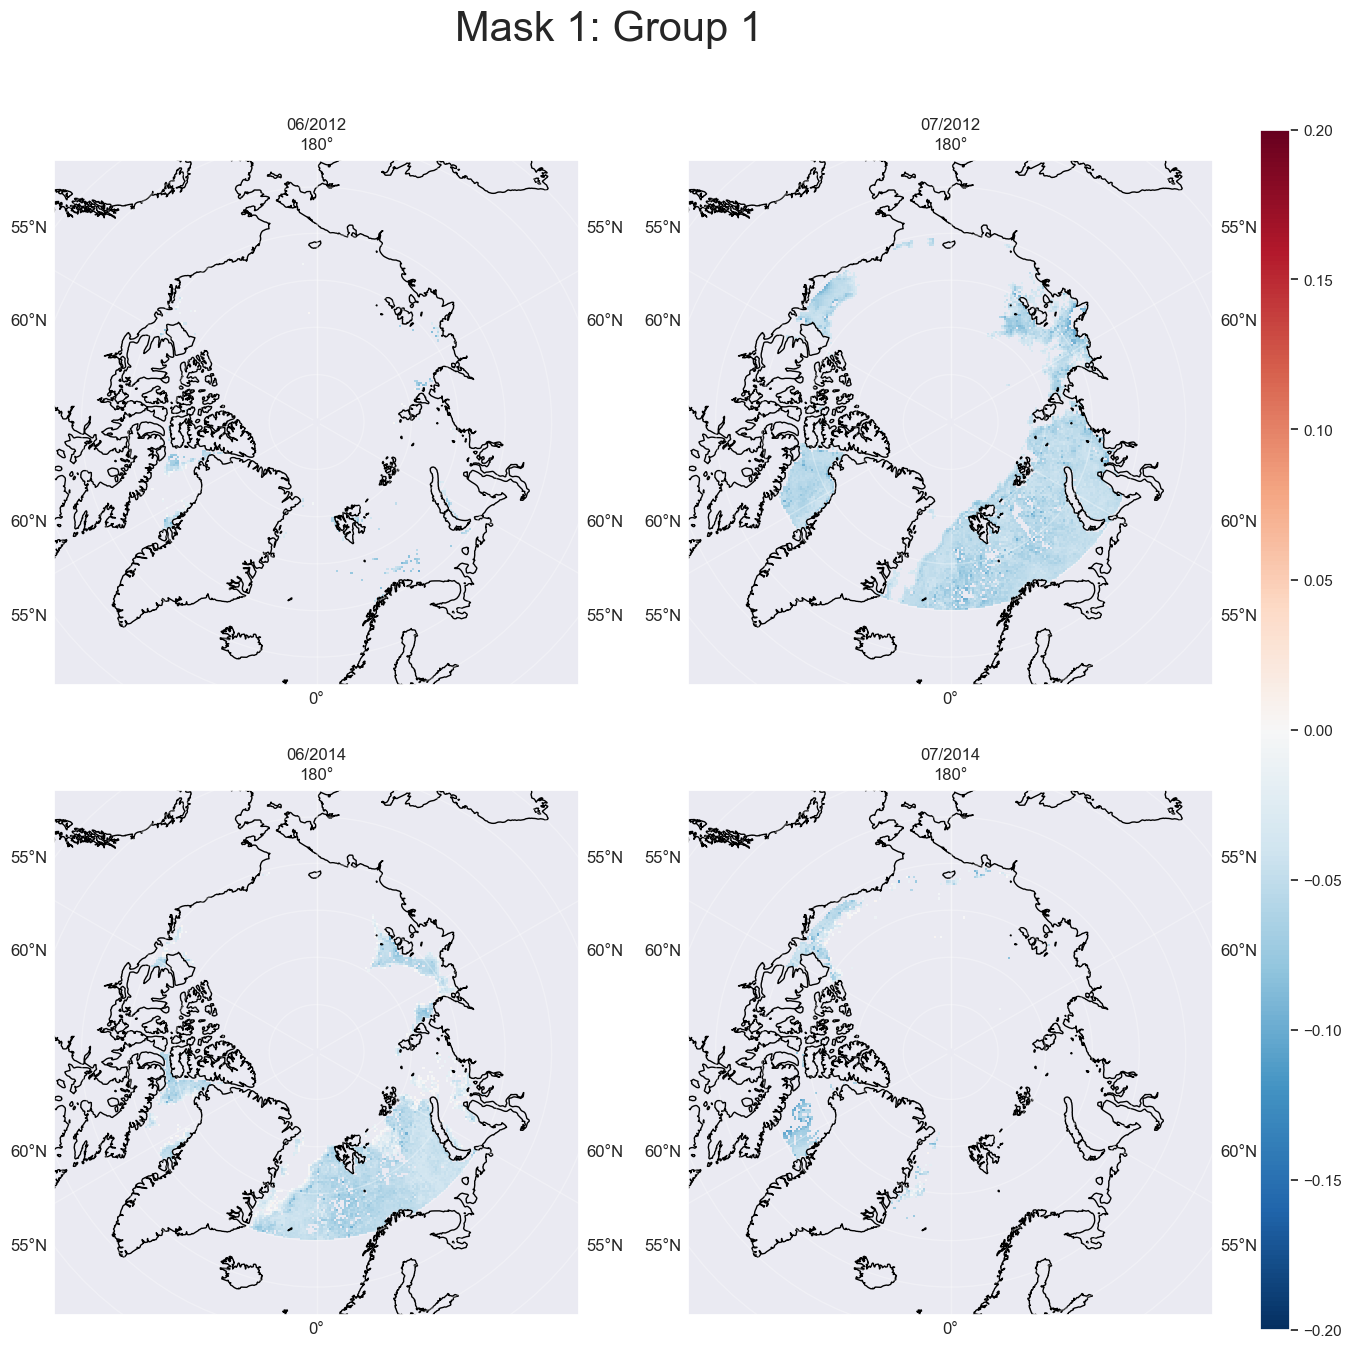

In [160]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062012_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072012_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062014_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072014_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 1: Group 1 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask1_Group1.png')

Plot group 2

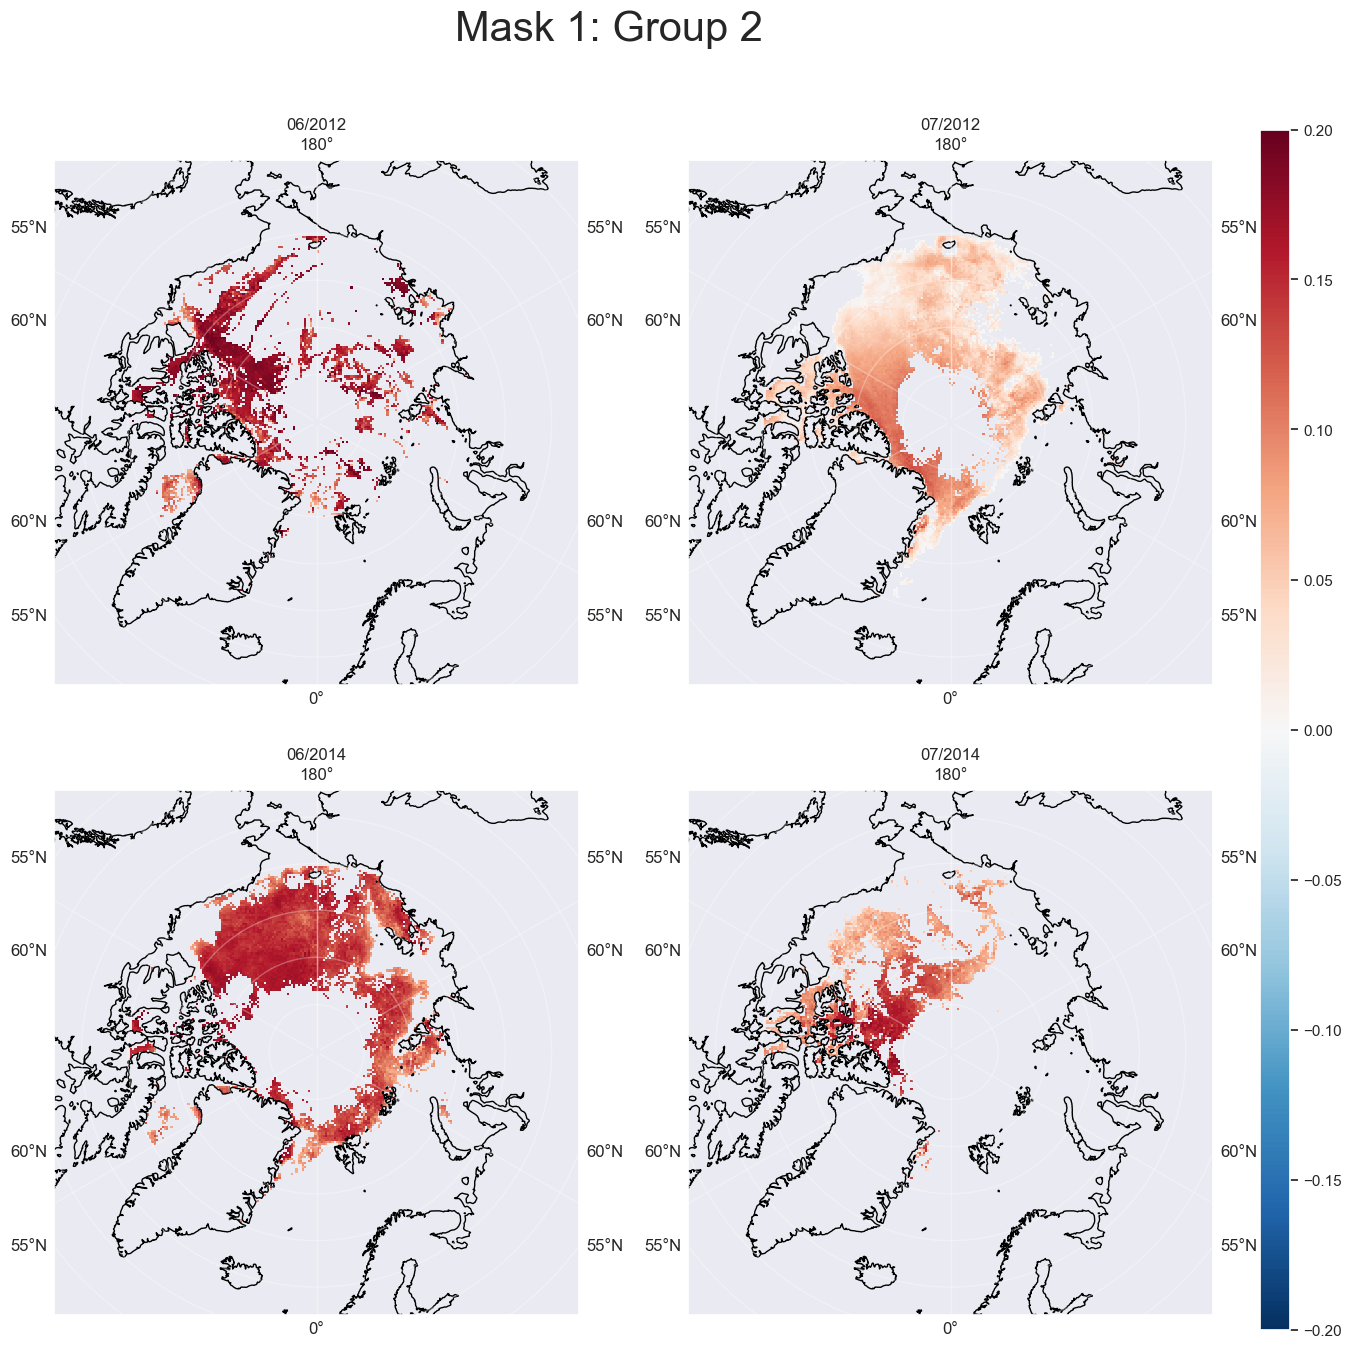

In [161]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062012_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072012_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062014_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072014_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 1: Group 2 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask1_Group2.png')

Plot group 3

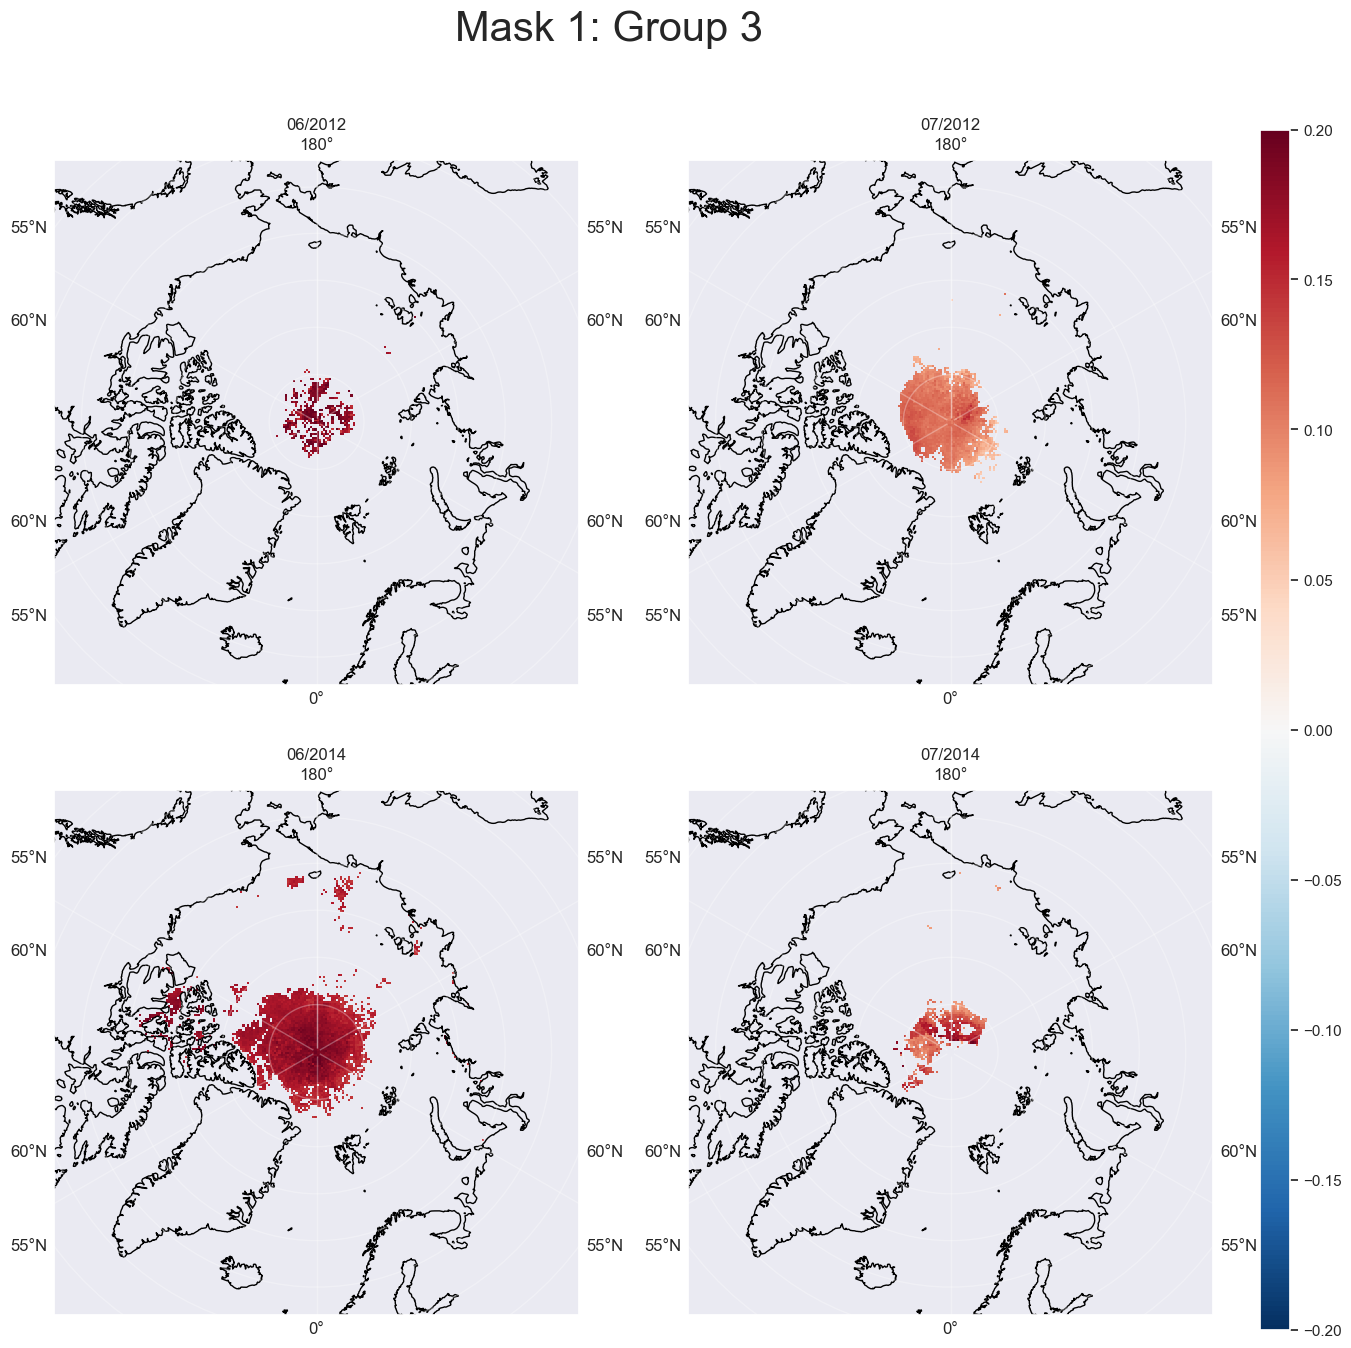

In [220]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062012_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072012_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_062014_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, masked_data_072014_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 1: Group 3 ', fontsize=30)
cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask1_Group3.png')

Plot group 4

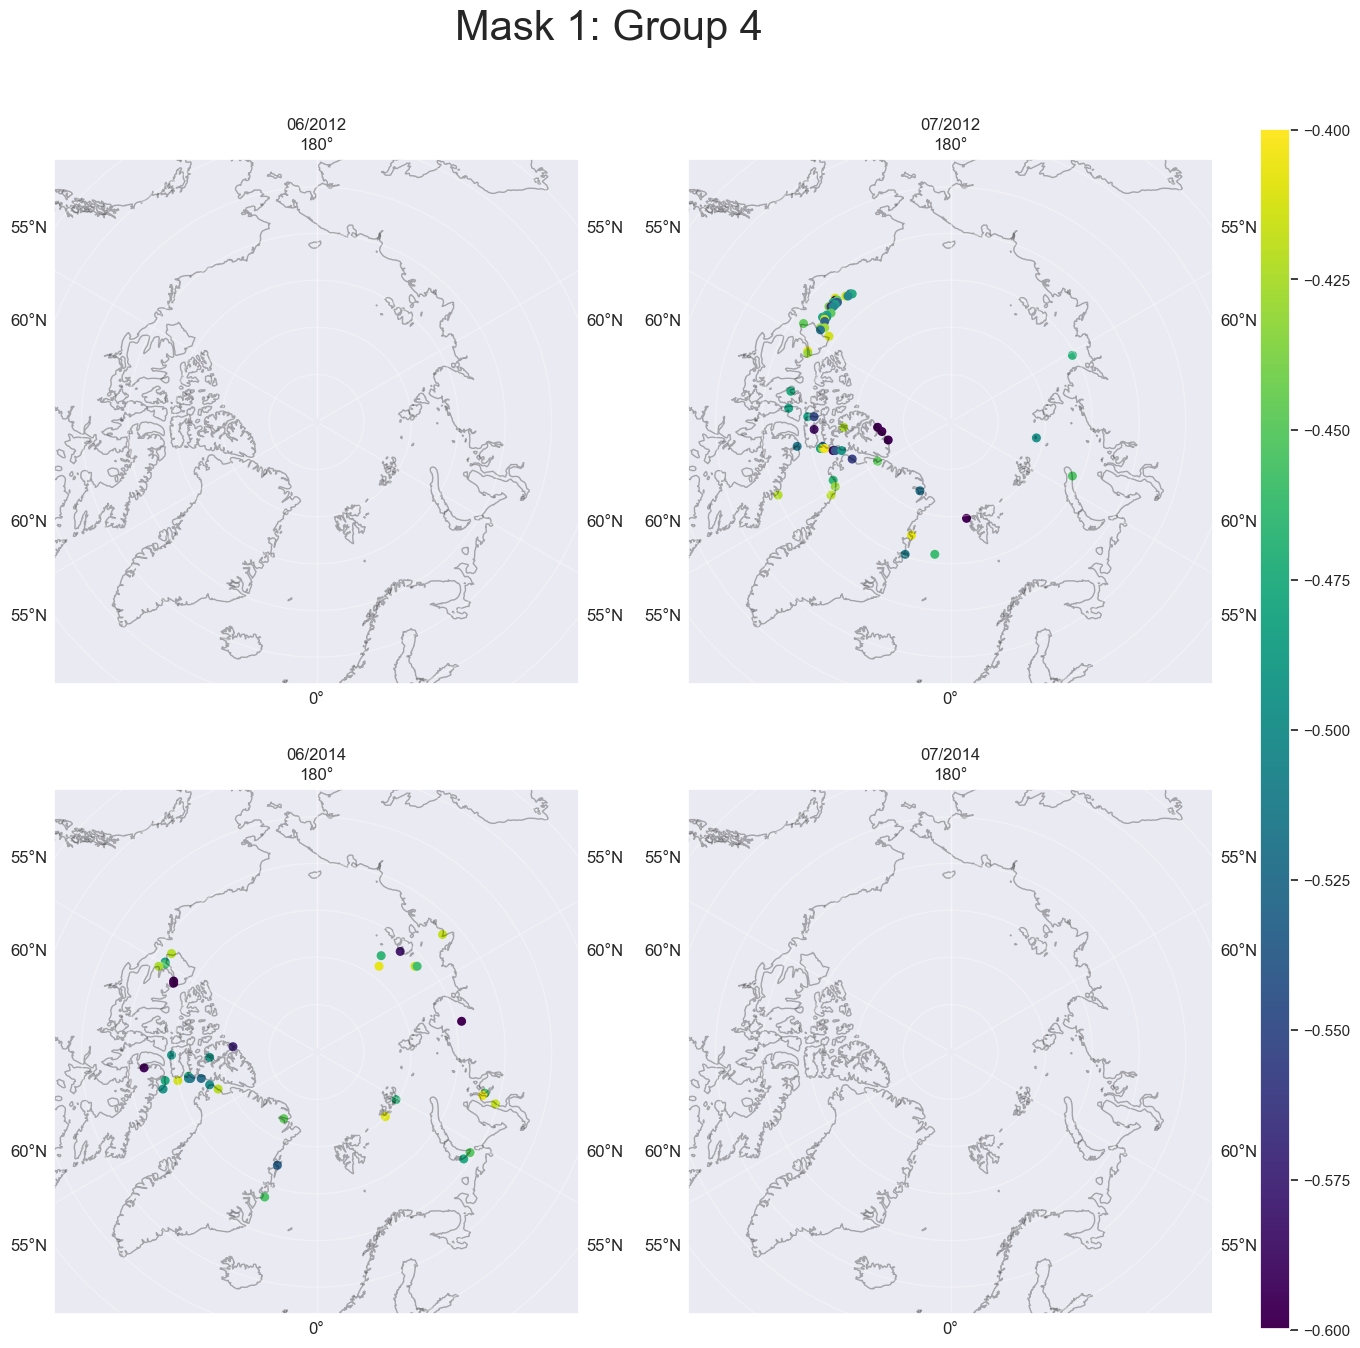

In [210]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=0.3)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.scatter(data_201206_4['lon'], data_201206_4['lat'], c=data_201206_4_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=0.3)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.scatter(data_201207_4['lon'], data_201207_4['lat'], c=data_201207_4_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=0.3)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.scatter(data_201406_4['lon'], data_201406_4['lat'], c=data_201406_4_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=0.3)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.scatter(data_201407_4['lon'], data_201407_4['lat'], c=data_201407_4_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 1: Group 4 ', fontsize=30)
cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask1_Group4.png')